In [1]:
import pyqsp
from pyqsp.LPoly import *
from pyqsp.gadgets import *
#import jax
#import jax.numpy as jnp
import numpy as np
from tqdm.notebook import tqdm
from scipy.interpolate import approximate_taylor_polynomial
from matplotlib import pyplot as plt
import copy

np.set_printoptions(linewidth=100000)

2023-09-15 21:46:00.183954: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
# extract 
G = AtomicGadget([[0, np.pi/4, -np.pi/4, 0]], [[0, 0, 0]], label="G")
G_ext = ExtractionGadget(32, "G_ext")
G_int = G.interlink(G_ext, [(('G', 0), ('G_ext', 0), None)])
prefactor2 = (np.kron(np.array([[0, 1], [1, 0]]), np.eye(2)))
fn = lambda x : (-prefactor2 @ G_int.get_qsp_unitary(("G_ext", 0))({('G', 0) : x}))[0][0]
assert fn(0.2) is not None

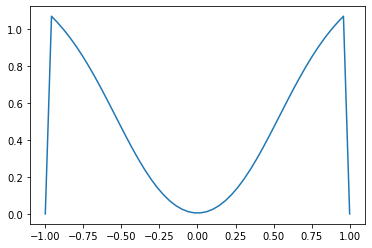

In [23]:
X = np.linspace(-1, 1, 50)
Y = np.array([np.angle(fn(x)) for x in X])
plt.plot(X,Y)

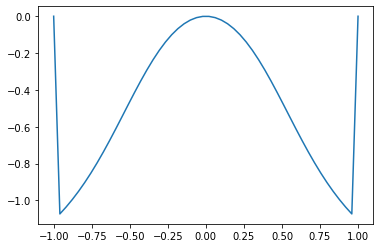

In [27]:
fn = lambda x: (G.get_qsp_unitary(("G",0))({('G',0): x}) )[0][1]
X = np.linspace(-1, 1, 50)
Y2 = np.array([np.angle(fn(x)) for x in X])
plt.plot(X,Y2)
# plt.plot(X,-Y )
idx = np.where(abs(X) < 0.8)

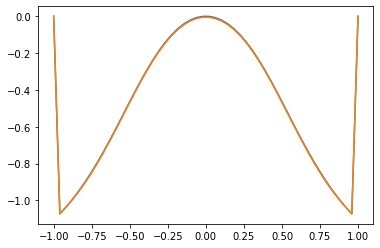

In [28]:
plt.plot(X,Y2)
plt.plot(X,-Y )

In [2]:
G = AtomicGadget([[0, np.pi/4, -np.pi/4, 0]], [[0, 0, 0]], label="G")
U = G.get_qsp_unitary(("G",0))({('G',0): 0.2})
U.shape

(2, 2)

In [30]:
abs(Y2-(-Y))[idx].mean()

0.004362903667756551

In [35]:
# now test correction of the pi/4 gadget
U = G_int.get_qsp_unitary(("G_ext", 0), correction=20)
print(f"G has depth {G.depth}")
print(f"U with correction has shape {U({('G',0):0.2}).shape}")
fn = lambda x : (-prefactor2 @ U({('G', 0) : x}))[0][0]

G has depth 1


WireError: Wires must be unique; got [0, 0].